
# Ford Gobike Data Exploration
## by Jin Jin

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


>The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data. Dataset used here is for 2020-01 only.

>Each trip is anonymized and includes:
Trip Duration (seconds)/
Start Time and Date/
End Time and Date/
Start Station ID/
Start Station Name/
Start Station Latitude/
Start Station Longitude/
End Station ID/
End Station Name/
End Station Latitude/
End Station Longitude/
Bike ID/
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df= pd.read_csv('202001-baywheels-tripdata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
### high-level overview of data shape and composition
df.shape

(295854, 14)

In [4]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object

In [5]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN
5,11333,2020-01-31 22:48:22.6390,2020-02-01 01:57:15.7160,60.0,8th St at Ringold St,37.774520,-122.409449,75.0,Market St at Franklin St,37.773793,-122.421239,12137,Customer,NaN
6,11341,2020-01-31 22:48:12.9890,2020-02-01 01:57:14.1650,60.0,8th St at Ringold St,37.774520,-122.409449,75.0,Market St at Franklin St,37.773793,-122.421239,12321,Customer,NaN
7,4038,2020-01-31 23:32:03.9070,2020-02-01 00:39:22.0210,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,-122.470651,1589,Customer,NaN
8,4059,2020-01-31 23:31:01.1610,2020-02-01 00:38:40.8570,450.0,Funston Ave at Irving St,37.763934,-122.470651,450.0,Funston Ave at Irving St,37.763934,-122.470651,12884,Customer,NaN
9,1980,2020-01-31 23:49:09.2300,2020-02-01 00:22:09.7540,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,198.0,Snow Park,37.807813,-122.264496,10464,Customer,NaN


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,295854.000000,146286.000000,295854.000000,295854.000000,145934.000000,295854.000000,295854.000000,295854.00000
mean,780.473193,168.900879,37.751277,-122.357866,161.061788,37.751261,-122.356994,321533.84539
std,2037.786317,141.956388,0.228337,0.650796,140.766154,0.238642,0.688512,307015.31534
min,60.000000,3.000000,0.000000,-122.513871,3.000000,0.000000,-122.513847,12.00000
25%,369.000000,53.000000,37.766214,-122.419481,43.000000,37.766376,-122.418306,11328.00000
50%,588.000000,120.000000,37.777158,-122.403234,113.000000,37.777370,-122.402717,279974.00000
75%,912.000000,263.000000,37.790102,-122.392450,250.000000,37.790492,-122.392546,545607.00000
max,811077.000000,506.000000,37.880222,0.000000,506.000000,37.927622,0.000000,999952.00000


### What is the structure of your dataset?

There are 295854 fordgobike trips in the dataset with 14 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, rental_access_method). Out of 14 specifications 10 are numerical, 2 are datetime, 5 are object type.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how trip duration is dependent on other specifications from the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duration is highly dependent on the start stations and end stations, more crowded places should receive more rides so some stations should be logging more duration sec. I also think user_type and rental access method should also effect trip duration.



## Univariate Exploration


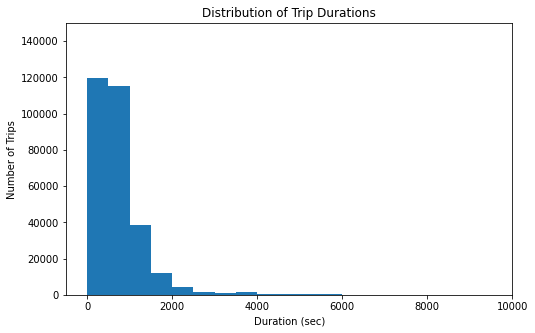

In [11]:
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 150000])
plt.show()

> There's a long tail in the distribution, so let's put it on a log scale instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


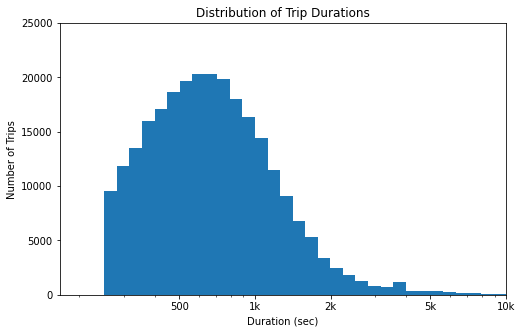

In [14]:
log_binsize = 0.05
log_bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 25000])
plt.show()

Trip duration is mostly concentrated on the lower spectrum. Most of the values are less than 2000 seconds with peak around 600 seconds. Trip duration values first increases starting from arount 8000 values at 0 to 20000 values at around 600 but then starts to fall and raching below 5000 values under 2000 sec.

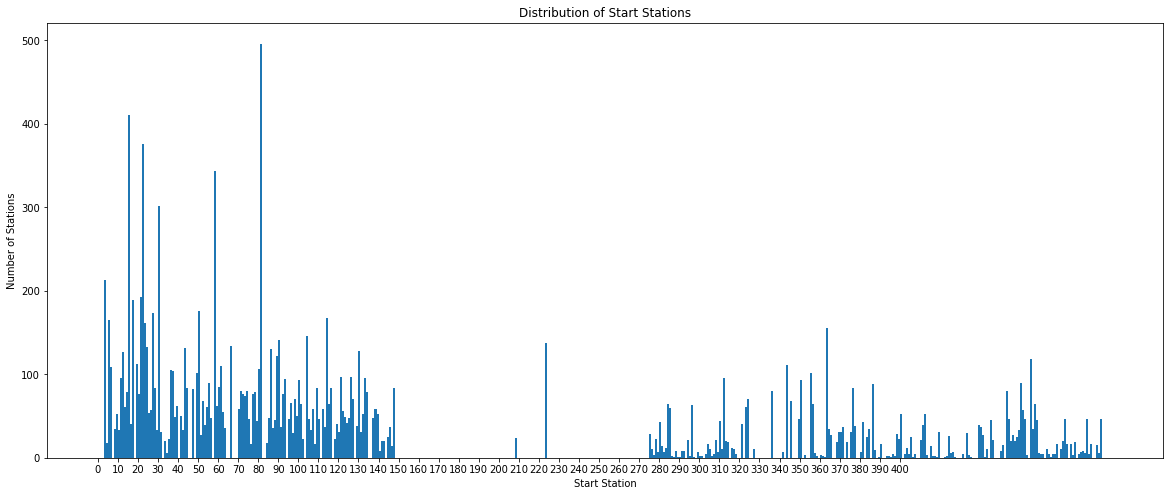

In [15]:
#Now lets look at other factors like start and end station id and birth year
# Plotting start station id distribution.
binsize = 1
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

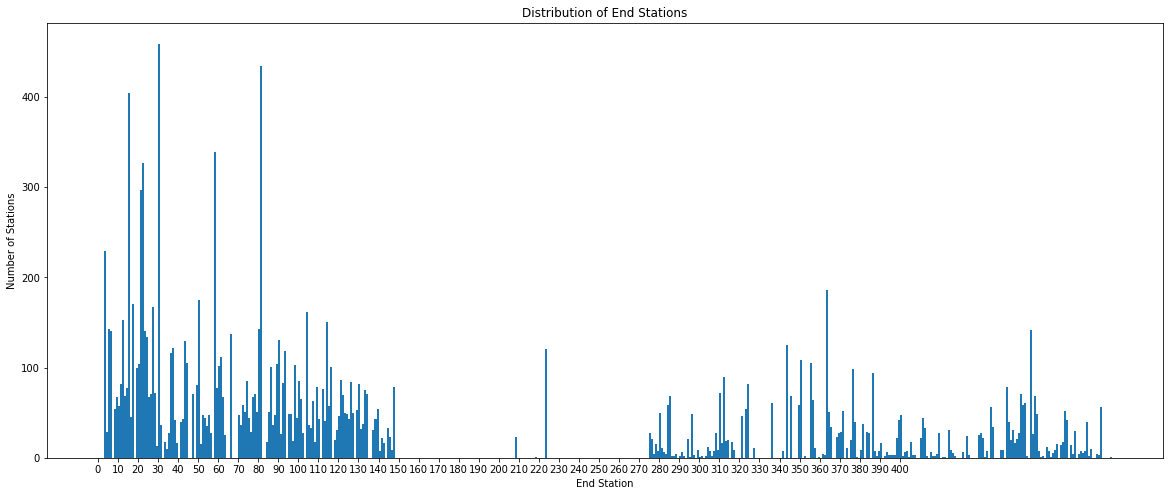

In [16]:
# Plotting end station id distribution.
binsize = 1
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

>We can see that same stations are more frequent as start stations and end stations.

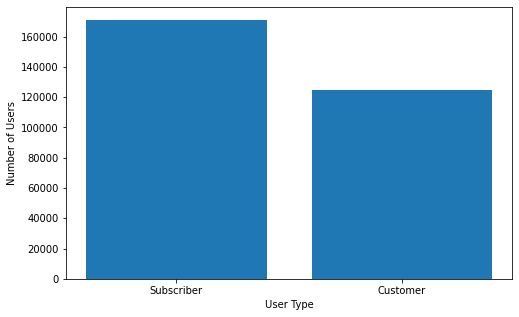

In [20]:
# plotting types of users on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

>We can see most of user type is Subscriber.

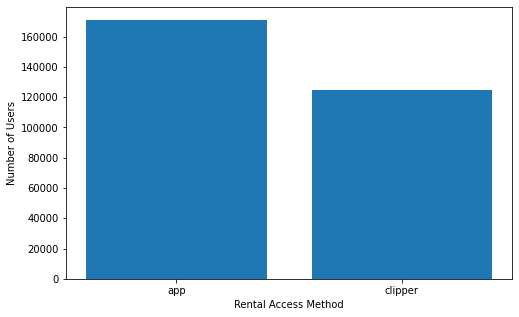

In [22]:
# plotting rental access method on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.rental_access_method.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('Rental Access Method')
plt.ylabel('Number of Users')
plt.show()

>We can see most of user is using App to access rental bike.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to dip and does not regain any more peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found the start station id and end station id are missing some data, only around 140k. And rental_access_method also have null values.

## Bivariate Exploration


Text(0.5, 1.0, 'Start station counts Against User Type')

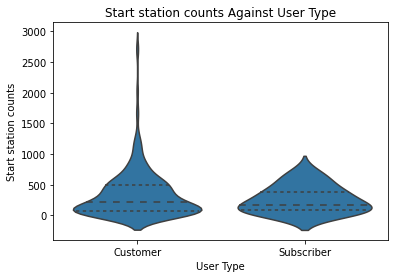

In [59]:
# plot relationship between user type and start station counts
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y=df['start_station_id'].value_counts(), color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Start station counts')
plt.title('Start station counts Against User Type')

Text(0.5, 1.0, 'End station counts Against User Type')

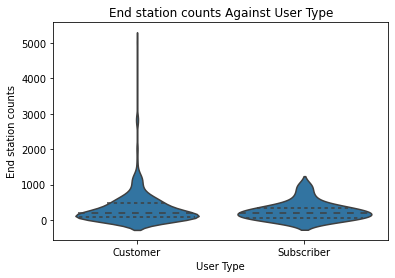

In [60]:
# plot relationship between user type and end station counts
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='user_type', y=df['end_station_id'].value_counts(), color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('End station counts')
plt.title('End station counts Against User Type')

>Now lets look into the duration dependency on start station and end station.

In [0]:
t = []

all_start_station_ids = sorted(df.start_station_id.unique())
for x in all_start_station_ids :
    t.append(df[df.start_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

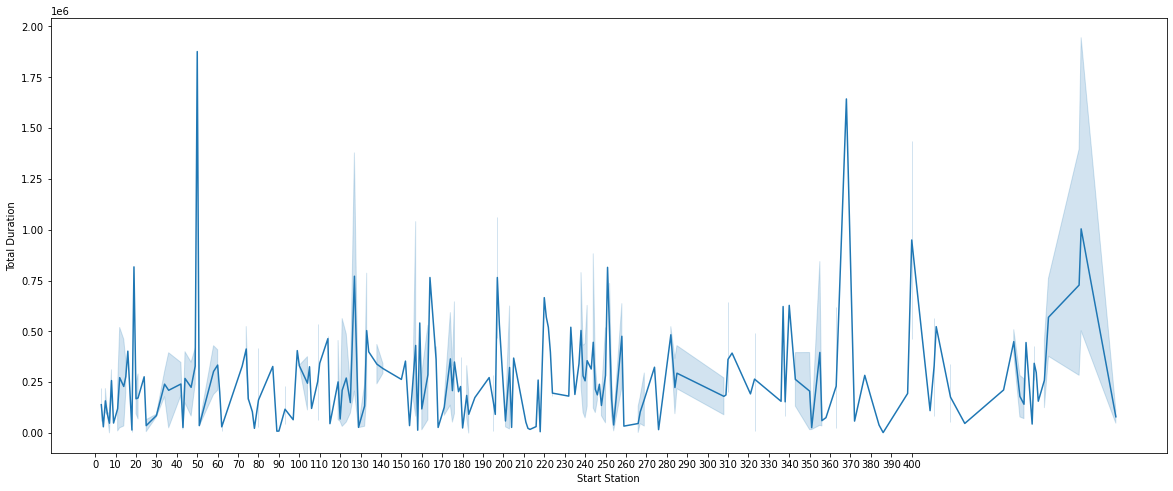

In [75]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('Start Station')
plt.ylabel('Total Duration')
plt.show()

In [0]:
t = []

all_end_station_ids = sorted(df.end_station_id.unique())
for x in all_end_station_ids :
    t.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(t)

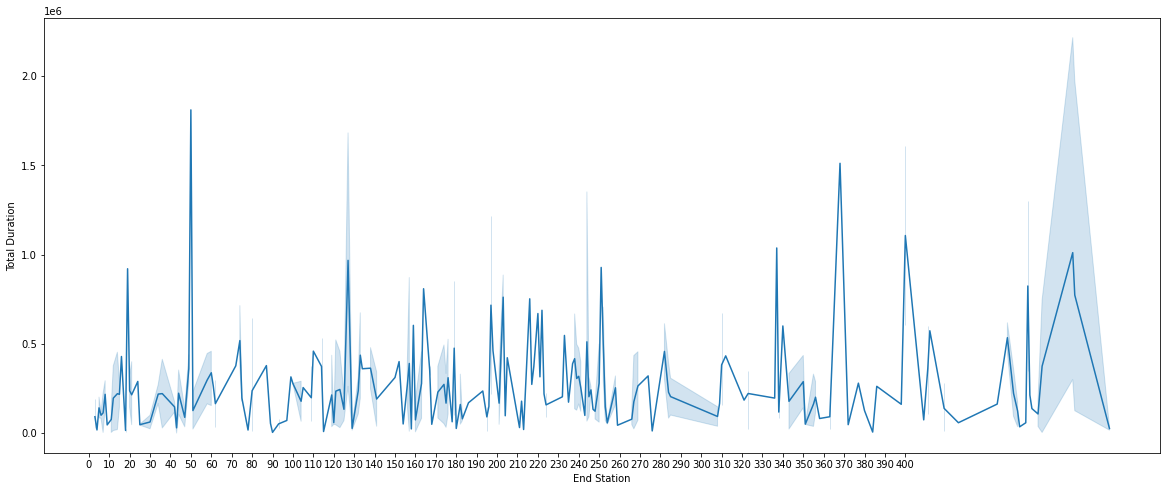

In [79]:
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('End Station')
plt.ylabel('Total Duration')
plt.show()

>By looking at these plots you can see that trip duration for some station as start station is higher and for some stations as end station is higher. By this we can see that what stations result in starting of longer trips and what stations comes end of longer trips.

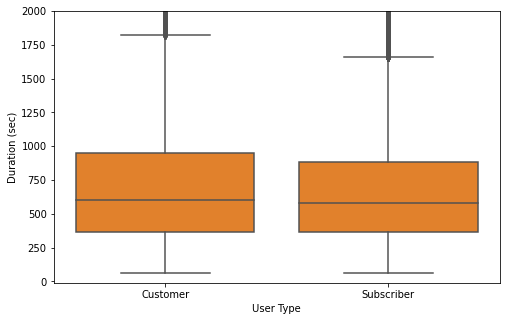

In [83]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.show()

>We can see that higher percentage of customer than subscribe.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Start station and end station does not much determine the trip duration. It only suggests that some starting stations are having higher trip durations as starting point and some end stations are having higher trip durations as ending point.But trip duration do have difference on user type, customer is a bit higher than subscriber.


## Multivariate Exploration

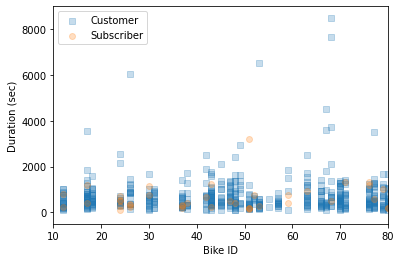

In [101]:
user_type_markers = [['Customer', 's'],['Subscriber', 'o']]

for utype, marker in user_type_markers:
    df_utype = df[df['user_type'] == utype]
    plt.scatter(df_utype['bike_id'], df_utype['duration_sec'], marker = marker, alpha=0.25)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.xlabel('Bike ID')
plt.ylabel('Duration (sec)')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


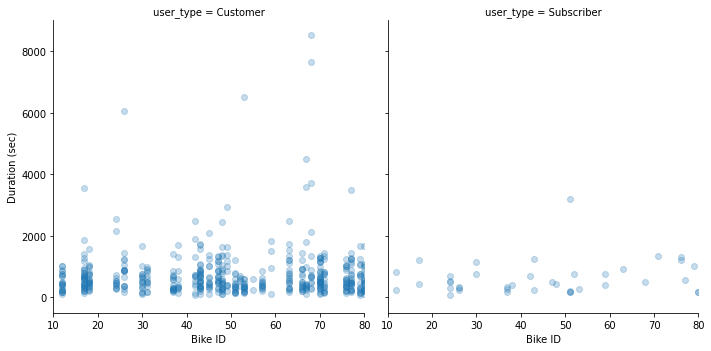

In [104]:
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'bike_id', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Bike ID')
user_types.set_ylabels('Duration (sec)')

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking into relationship between bike id and customer type. We can see on customer side, bike id duration time is more than subscribers.
